In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('train.csv')
#changed to relative path - works if 

import warnings
warnings.filterwarnings("ignore")

In [163]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,22256635,"Nonsense? kiss off, geek. what I said is true...",1,0,0,0,0,0
1,27450690,"""\n\n Please do not vandalize pages, as you di...",0,0,0,0,0,0
2,54037174,"""\n\n """"Points of interest"""" \n\nI removed the...",0,0,0,0,0,0
3,77493077,Asking some his nationality is a Racial offenc...,0,0,0,0,0,0
4,79357270,The reader here is not going by my say so for ...,0,0,0,0,0,0


In [268]:
df.shape

(95851, 8)

In [3]:
df.comment_text = df.comment_text.str.lower()

In [4]:
df.comment_text.head()

0    nonsense?  kiss off, geek. what i said is true...
1    "\n\n please do not vandalize pages, as you di...
2    "\n\n ""points of interest"" \n\ni removed the...
3    asking some his nationality is a racial offenc...
4    the reader here is not going by my say so for ...
Name: comment_text, dtype: object

In [5]:
df.comment_text.max().lower()

"\ufeffsensual pleasures of the minditalic text\n\nthere are endless creative ways to provoke and capture sensual feelings. money can’t buy it, you can’t see it or hold it, outer\npackaging offers no competition for it and no grandiose flash of materialistic presence can incite it. sensuality in it’s truest sense can only be felt within.  it is provoked by and through the power and brilliance of the mind. it is born there and lives there.\n\nsince it is a feeling rather than a physical event, it is more difficult to achieve and maintain than might be found with other less deeply rooted sexual experiences.  knowledge, intuition and creativity are the tools necessary to discover where it lives and how to awaken it, what it takes to stimulate it and how to nurture it so it will grow. a conscientious partner can create a need and cravings simply by using the power of the mind.    \n\nall of this offers new meaning to the old adage about the mind being a terrible thing to waste. there are h

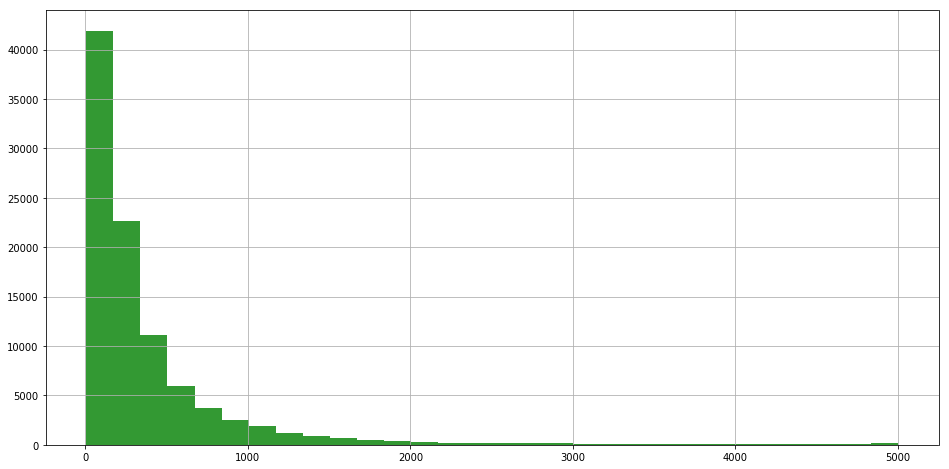

In [6]:
df.comment_text.str.len().hist(bins = 30, figsize =(16,8), color = 'g', alpha = .8)
plt.show()

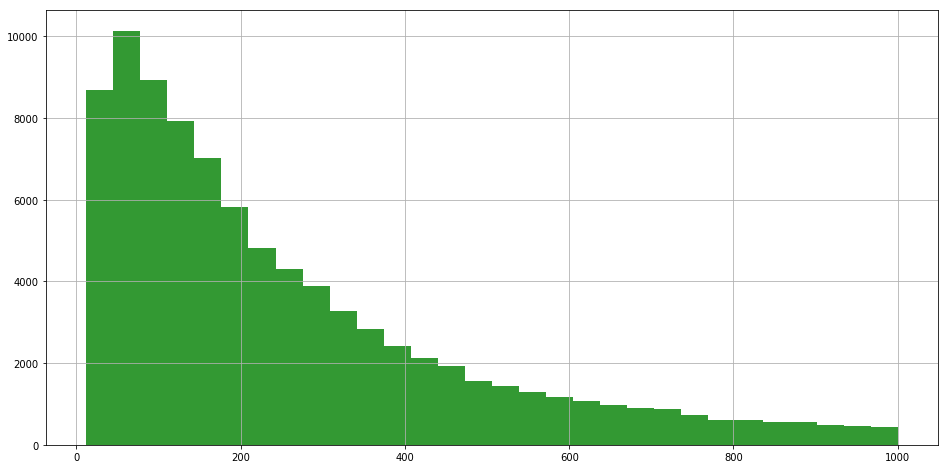

In [7]:
df1 = df[df.comment_text.str.len().between(10,1000)]
df1.comment_text.str.len().hist(bins = 30, figsize =(16,8), color = 'g', alpha = .8)
plt.show()

In [8]:
label_cols = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
df1['none'] = 1-df1[label_cols].max(axis=1)
df1.describe()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate,none
count,8.784500e+04,87845.000000,87845.000000,87845.000000,87845.000000,87845.000000,87845.000000,87845.000000
mean,4.991146e+11,0.099835,0.009904,0.055291,0.003301,0.052023,0.008709,0.894507
std,2.889562e+11,0.299781,0.099024,0.228548,0.057362,0.222076,0.092913,0.307189
min,2.225664e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.466986e+11,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,4.998802e+11,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,7.494692e+11,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999882e+11,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
df1[df1.comment_text.isnull()]

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,none


In [10]:
df1[df1.severe_toxic == True].head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,none
213,2248673613,f'uck you administrators (i will be back to tr...,1,1,1,0,1,0,0
811,8513138241,this user is a fucking douche bag,1,1,1,0,1,0,0
869,9111992246,fuck \n\n62.158.73.165 62.158.73.165 62.158...,1,1,1,0,1,0,0
1223,12813745232,fuck you \n\nyou suck. leave me alone. fuck ti...,1,1,1,0,1,0,0
1563,16306156070,i am going to shoot you in the head and laugh ...,1,1,0,1,0,0,0


In [186]:
df1.comment_text[0]

"nonsense?  kiss off, geek. what i said is true.  i'll have your account terminated."

In [187]:
import gensim.models.word2vec as w2v

rude2vec = w2v.Word2Vec(
    sg = 1,
    seed = 42,
    workers = 4,
    size = 300,
    min_count = 10,
    window = 5,
    sample = 1e-3,
)

In [188]:
def sentence_to_wordlist(raw):
    clean = re.sub("[^a-zA-Z]"," ", raw)
    words = clean.split()
    return words

df1.comment_text = df1.comment_text.apply(sentence_to_wordlist)

In [189]:
df1.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,none
0,22256635,"[nonsense, kiss, off, geek, what, i, said, is,...",1,0,0,0,0,0,0
1,27450690,"[please, do, not, vandalize, pages, as, you, d...",0,0,0,0,0,0,1
2,54037174,"[points, of, interest, i, removed, the, points...",0,0,0,0,0,0,1
3,77493077,"[asking, some, his, nationality, is, a, racial...",0,0,0,0,0,0,1
4,79357270,"[the, reader, here, is, not, going, by, my, sa...",0,0,0,0,0,0,1


In [190]:
rude2vec.build_vocab(df1.comment_text)

In [191]:
print("Rude2word vocabulary length:", len(rude2vec.wv.vocab))

Rude2word vocabulary length: 13646


In [192]:
rude2vec.train(df1.comment_text,
               total_examples = len(rude2vec.wv.vocab),
               epochs = rude2vec.iter)

13814069

In [196]:
rude2vec.most_similar('rape')

[('butt', 0.9264711737632751),
 ('sucking', 0.9249253273010254),
 ('bastard', 0.9232757091522217),
 ('nigga', 0.9227551221847534),
 ('pussy', 0.9192421436309814),
 ('twat', 0.91874098777771),
 ('mother', 0.9182966947555542),
 ('bag', 0.9108788967132568),
 ('fucker', 0.909322202205658),
 ('dirty', 0.9079699516296387)]

In [198]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0)

In [201]:
rude2vec.syn1neg.shape

(13646, 300)

In [202]:
all_word_vectors_matrix = rude2vec.syn1neg

In [203]:
all_word_vectors_matrix_2d = tsne.fit_transform(all_word_vectors_matrix)

In [206]:
points = pd.DataFrame(
    [
        (word, coords[0], coords[1])
        for word, coords in [
            (word, all_word_vectors_matrix_2d[rude2vec.wv.vocab[word].index])
            for word in rude2vec.wv.vocab
        ]
    ],
    columns=["word", "x", "y"]
)

In [207]:
points.head()

,word,x,y
0,nonsense,-24.212635,-58.010708
1,kiss,-45.335377,-22.027439
2,off,-34.857616,-35.517921
3,geek,-42.606728,-1.277928
4,what,-44.723625,-42.087250


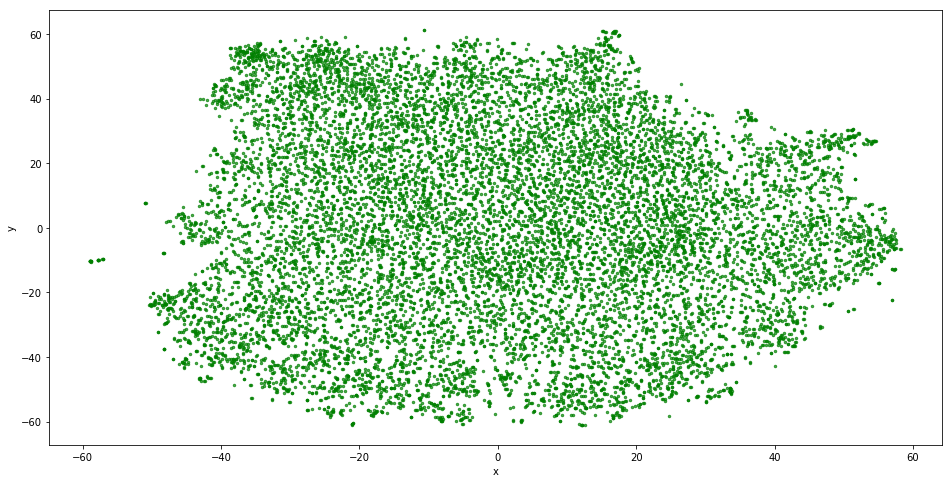

In [217]:
points.plot.scatter("x", "y", s=6, figsize=(16, 8), color = 'g', alpha = .7)
plt.show()

In [260]:
def plot_region(x_bounds, y_bounds):
    slice_toplot = points[
        (x_bounds[0] <= points.x) &
        (points.x <= x_bounds[1]) & 
        (y_bounds[0] <= points.y) &
        (points.y <= y_bounds[1])
    ]
    plt.figure(figsize = (16, 8))
    plt.scatter(slice_toplot.x, slice_toplot.y, s=10, color = 'g', alpha = .7)
    for i, point in slice_toplot.iterrows():
        plt.text(point.x + 0.005, point.y + 0.005, point.word, fontsize=12)
    plt.show()

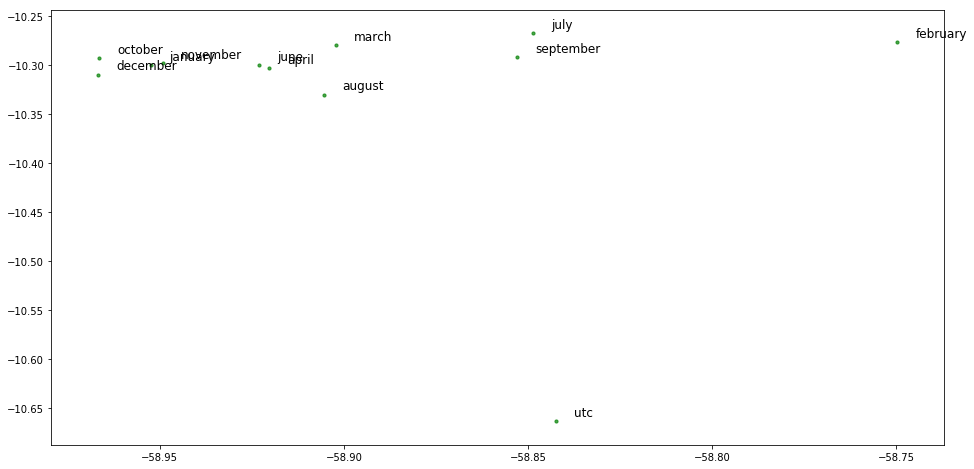

In [261]:
plot_region(x_bounds=(-59, -58.5), y_bounds=(-20, 0))

In [265]:
points[points.word == 'fuck']

,word,x,y
1002,fuck,-50.448498,-24.063412


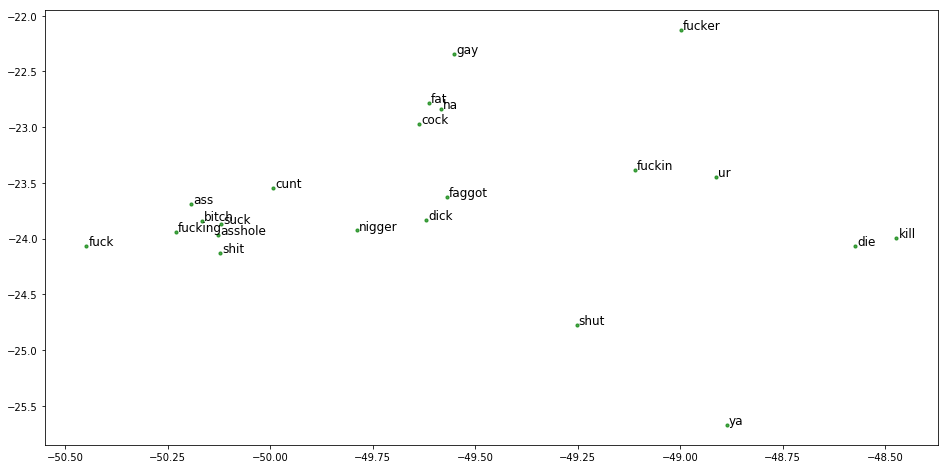

In [267]:
x = -50.448498
y = -24.063412
d = 2

plot_region(x_bounds=(x-d, x+d), y_bounds=(y-d, y+d))

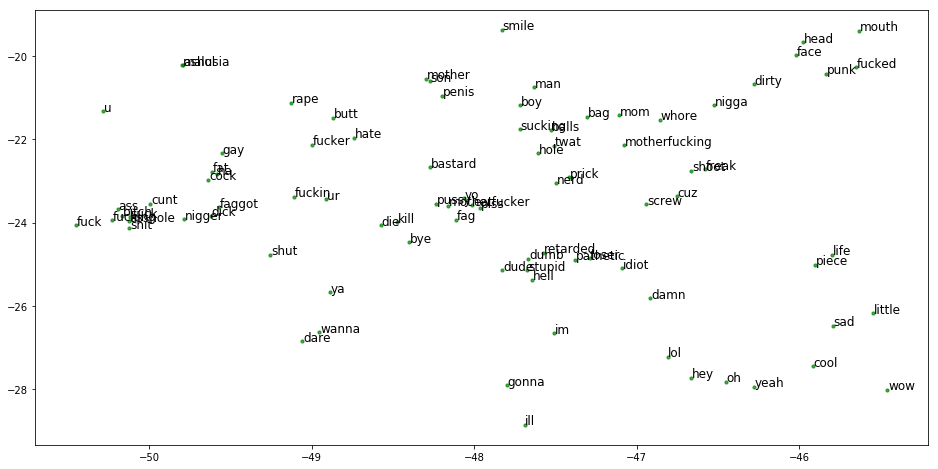

In [269]:
x = -50.448498
y = -24.063412
d = 5

plot_region(x_bounds=(x-d, x+d), y_bounds=(y-d, y+d))

In [271]:
rude2vec.most_similar('no')

[('absolutely', 0.7096289992332458),
 ('whatsoever', 0.6904635429382324),
 ('only', 0.6876623630523682),
 ('valid', 0.6864269971847534),
 ('nothing', 0.6717880964279175),
 ('proof', 0.6672357320785522),
 ('strong', 0.6617904901504517),
 ('besides', 0.6601396799087524),
 ('zero', 0.6586592793464661),
 ('serious', 0.6552495956420898)]

In [283]:
points[points.word == 'no'][['x','y']].values

array([[ 15.81840992, -56.98339844]])

In [332]:
points[points.word == 'fuck'][['x','y']].values

array([[-50.44849777, -24.06341171]])

In [333]:
a = points[points.word == 'no'][['x','y']].values
b = points[points.word == 'fuck'][['x','y']].values
c = a + b

np.concatenate((a,b,c), axis = 0)

array([[ 15.81840992, -56.98339844],
       [-50.44849777, -24.06341171],
       [-34.63008785, -81.04681015]])

In [336]:
M[:,0]

array([ 15.81840992, -50.44849777, -34.63008785])

In [350]:
max(M[:,1] or 0)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

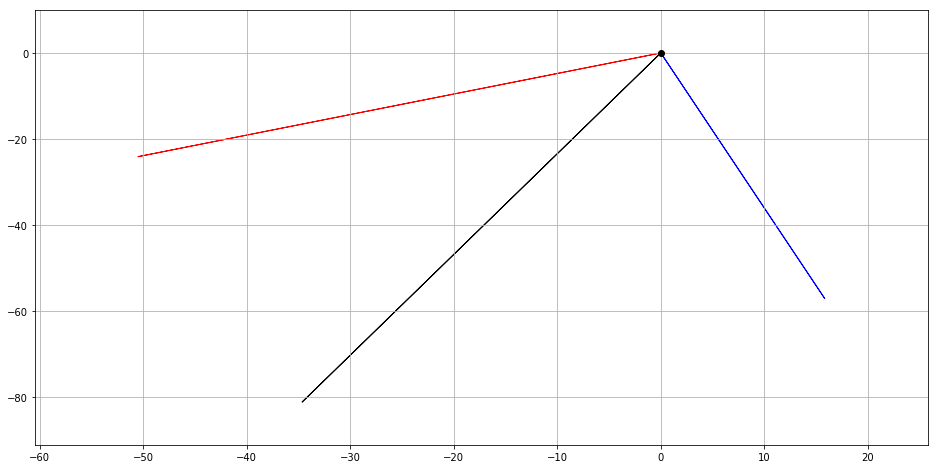

In [356]:
import numpy as np
import matplotlib.pyplot as plt
M = np.concatenate((a,b,c), axis = 0)
add = 10

rows,cols = M.T.shape

#Get absolute maxes for axis ranges to center origin
#This is optional
maxes = 1.1*np.amax(abs(M), axis = 0)
colors = ['b','r','k']

plt.figure(figsize = (16,8))
for i,l in enumerate(range(0,cols)):
    plt.axes().arrow(0,0,M[i,0],M[i,1],head_width=0.05,head_length=0.1,color = colors[i])

plt.plot(0,0,'ok') #<-- plot a black point at the origin
plt.xlim(min(M[:,0])-add,max(M[:,0])+add) #<-- set the x axis limits
plt.ylim(min(M[:,1])-add,0+add) #<-- set the y axis limits
plt.grid(b=True, which='major') #<-- plot grid lines
plt.show()

In [357]:
df1.comment_text[0]

['nonsense',
 'kiss',
 'off',
 'geek',
 'what',
 'i',
 'said',
 'is',
 'true',
 'i',
 'll',
 'have',
 'your',
 'account',
 'terminated']

In [371]:



collect_comment = np.array([0,0])

for i in df1.comment_text[0]:
    print(points[points.word == i][['x','y']].values)
    collect_comment = (collect_comment + (points[points.word == i][['x','y']].values))/2
collect_collect.append(collect_comment)

[[-24.21263504 -58.01070786]]
[[-45.33537674 -22.02743912]]
[[-34.85761642 -35.51792145]]
[[-42.6067276   -1.27792835]]
[[-44.72362518 -42.08724976]]
[[-43.63348007 -38.04076004]]
[[-30.79613304 -35.69115067]]
[[ 15.91147518 -46.06033707]]
[[ 11.96606541 -52.13204193]]
[[-43.63348007 -38.04076004]]
[[-34.84835815 -45.17908096]]
[[ -1.46598375 -48.60415268]]
[[-35.59609222 -52.60401917]]
[[-22.03432083 -41.99192429]]
[[-11.49023628  18.71725273]]


In [372]:
collect_collect

[array([[-17.5527394 , -13.48122591]])]

In [414]:
collect_collect = []
stop = 0

for index, row in df1.iterrows():
    collect_comment = np.array([0,0])
    stop +=1
    
    for words in row.comment_text:
        if (words in points.word.values):
            collect_comment = (collect_comment + (points[points.word == words][['x','y']].values))/2
        
    collect_collect.append(collect_comment)
    
    if (stop % 1000  == 0):
        #break
        print(df1.shape[0]-stop)

86845
85845


KeyboardInterrupt: 

trying doc2vec - Mike

In [1]:
import pandas as pd
import gensim
import smart_open

def read_corpus(input_data, labels, tokens_only=False):
    #print(labels)
    for comment, token in list(zip(input_data, labels)):
        #print(list(token))
        if tokens_only:
            yield gensim.utils.simple_preprocess(comment)
        else:
            # For training data, add tags
            yield gensim.models.doc2vec.TaggedDocument(gensim.utils.simple_preprocess(comment), token)
            


C:\Users\geomadc\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\utils.py:860: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [7]:
train_data = pd.read_csv("train.csv")

In [8]:
reduced = train_data.iloc[0:1000]
reduced.shape[0]

1000

In [9]:
reduced.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,22256635,"Nonsense? kiss off, geek. what I said is true...",1,0,0,0,0,0
1,27450690,"""\n\n Please do not vandalize pages, as you di...",0,0,0,0,0,0
2,54037174,"""\n\n """"Points of interest"""" \n\nI removed the...",0,0,0,0,0,0
3,77493077,Asking some his nationality is a Racial offenc...,0,0,0,0,0,0
4,79357270,The reader here is not going by my say so for ...,0,0,0,0,0,0


In [21]:
train_corpus = list(read_corpus(train_data.comment_text, 
                                train_data[['toxic','severe_toxic','obscene','threat',
                                            'insult', 'identity_hate']].values.tolist()))

In [10]:
reduced = list(read_corpus(reduced.comment_text, 
                                reduced[['toxic','severe_toxic','obscene','threat',
                                            'insult', 'identity_hate']].values.tolist()))

In [12]:
print(reduced[:10])

[TaggedDocument(words=['nonsense', 'kiss', 'off', 'geek', 'what', 'said', 'is', 'true', 'll', 'have', 'your', 'account', 'terminated'], tags=[1, 0, 0, 0, 0, 0]), TaggedDocument(words=['please', 'do', 'not', 'vandalize', 'pages', 'as', 'you', 'did', 'with', 'this', 'edit', 'to', 'merwin', 'if', 'you', 'continue', 'to', 'do', 'so', 'you', 'will', 'be', 'blocked', 'from', 'editing'], tags=[0, 0, 0, 0, 0, 0]), TaggedDocument(words=['points', 'of', 'interest', 'removed', 'the', 'points', 'of', 'interest', 'section', 'you', 'added', 'because', 'it', 'seemed', 'kind', 'of', 'spammy', 'know', 'you', 'probably', 'didn', 'mean', 'to', 'disobey', 'the', 'rules', 'but', 'generally', 'point', 'of', 'interest', 'tends', 'to', 'be', 'rather', 'touristy', 'and', 'quite', 'irrelevant', 'to', 'an', 'area', 'culture', 'that', 'just', 'my', 'opinion', 'though', 'if', 'you', 'want', 'to', 'reply', 'just', 'put', 'your', 'reply', 'here', 'and', 'add', 'talkback', 'jamiegraham', 'on', 'my', 'talkpage'], tags

In [22]:
model = gensim.models.doc2vec.Doc2Vec(size=50, min_count=2, iter=55)
model.build_vocab(train_corpus)

In [13]:
model_red = gensim.models.doc2vec.Doc2Vec(size=50, min_count=2, iter=55)
model_red.build_vocab(reduced)

In [ ]:
%time model.train(train_corpus, total_examples=model.corpus_count, epochs=model.iter)

In [14]:
%time model_red.train(reduced, total_examples=model_red.corpus_count, epochs=model_red.iter)

Wall time: 2.72 s


2871912

4039